# **Este análisis busca evaluar las tendencias de emisiones de gases de efecto invernadero (GEI) por país y sector entre 2000 y 2023. El enfoque estará en:**

- Identificar los países más emisores.
- Observar cambios a lo largo del tiempo.
- Comparar niveles de emisiones antes y después de políticas climáticas clave.
- Producir visualizaciones que faciliten la comprensión de estos datos.

In [2]:
## Instalar e Importar librerias
import sys
print(sys.executable)
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install matplotlib seaborn
import xlrd
print(xlrd.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\doral\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\doral\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\doral\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\doral\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\doral\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2.0.1


In [3]:
# Emisiones anuales CO por Región

anual_co_emissions_region = pd.read_csv("C:/Users/doral/Documents/Documentos Richard/TALENTO TECH/Proyecto Final/annual-co-emissions-by-region.csv")
print("OWID")

OWID


In [4]:
# Emisiones por sector
bysector = pd.read_csv("C:/Users/doral/Documents/Documentos Richard/TALENTO TECH/Proyecto Final/co-emissions-by-sector (1)/co-emissions-by-sector.csv")

In [5]:
# OWID - Emisiones globales

greenhouse = pd.read_csv("C:/Users/doral/Documents/Documentos Richard/TALENTO TECH/Proyecto Final/greenhouse-gas-emissions.csv")
print("Our World in Data (OWID)")

Our World in Data (OWID)


In [26]:
anual_co_emissions_region.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions',
       'Annual CO₂ emissions.1'],
      dtype='object')

In [7]:
bysector.columns

Index(['Entity', 'Code', 'Year', 'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels'],
      dtype='object')

In [8]:
greenhouse.columns

Index(['Entity', 'Year', 'Annual greenhouse gas emissions in CO₂ equivalents'], dtype='object')

In [9]:
anual_co_emissions_region = anual_co_emissions_region.drop(columns=['Annual CO₂ emissions.1'])
# Eliminamos valores nulos
anual_co_emissions_region = anual_co_emissions_region.dropna(subset=['Annual CO₂ emissions'])
# Revisar datos
anual_co_emissions_region = anual_co_emissions_region.dropna(subset=['Year'])
anual_co_emissions_region['Year'] = anual_co_emissions_region['Year'].astype(int)

In [10]:
anual_co_emissions_region

,Entity,Code,Year,Annual CO₂ emissions
0,Africa,NaN,1884,2.198400e+04
1,Africa,NaN,1885,3.664000e+04
2,Africa,NaN,1886,4.763200e+04
3,Africa,NaN,1887,4.763200e+04
4,Africa,NaN,1888,8.060800e+04
...,...,...,...,...
2263,United States,USA,2019,5.262145e+09
2264,United States,USA,2020,4.714628e+09
2265,United States,USA,2021,5.032213e+09
2266,United States,USA,2022,5.078871e+09


In [12]:
bysector

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,320000.0,20000.00
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0,20000.00
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0,20000.00
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0,20000.00
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,1070000.00,470000.0,87160000.0,250000.0,2000000.0,1240000.0,NaN,5100000.0,129999.99
6556,Zimbabwe,ZWE,2018,1030000.00,560000.0,87160000.0,320000.0,2620000.0,1540000.0,NaN,5400000.0,160000.00
6557,Zimbabwe,ZWE,2019,890000.00,470000.0,87160000.0,280000.0,2240000.0,1610000.0,NaN,4990000.0,160000.00
6558,Zimbabwe,ZWE,2020,970000.00,500000.0,87160000.0,340000.0,1510000.0,1400000.0,NaN,3840000.0,60000.00


In [11]:
greenhouse

,Entity,Year,Annual greenhouse gas emissions in CO₂ equivalents
0,Afghanistan,1850,7435743.5
1,Afghanistan,1851,7499858.5
2,Afghanistan,1852,7560495.5
3,Afghanistan,1853,7619898.0
4,Afghanistan,1854,7678120.0
...,...,...,...
37405,Zimbabwe,2019,34347856.0
37406,Zimbabwe,2020,31322906.0
37407,Zimbabwe,2021,33549390.0
37408,Zimbabwe,2022,33772416.0


In [13]:
print(type(anual_co_emissions_region))

<class 'pandas.core.frame.DataFrame'>


In [14]:
# Convertir año a numérico si no lo está
greenhouse['Year'] = pd.to_numeric(greenhouse['Year'], errors='coerce')

# Eliminar nulos
greenhouse = greenhouse.dropna(subset=['Annual greenhouse gas emissions in CO₂ equivalents'])

In [21]:
# Filtrar para quedarnos solo con datos desde el año 2000
anual_co = anual_co_emissions_region[anual_co_emissions_region['Year'] >= 2000]
bysector_ = bysector[bysector['Year'] >= 2000]
greenhouse_ = greenhouse[greenhouse['Year'] >= 2000]
# Verificación
print("Años en anual co emissiones region:",anual_co_emissions_region['Year'].min(), "-", anual_co_emissions_region['Year'].max())
print("Años en bysector:", bysector['Year'].min(), "-", bysector['Year'].max())
print("Años en greenhouse:", greenhouse['Year'].min(), "-", greenhouse['Year'].max())

Años en anual co emissiones region: 1750 - 2023
Años en bysector: 1990 - 2021
Años en greenhouse: 1850 - 2023


In [40]:
anual_co

,Entity,Code,Year,Annual CO₂ emissions
116,Africa,NaN,2000,9.308508e+08
117,Africa,NaN,2001,9.206018e+08
118,Africa,NaN,2002,8.999958e+08
119,Africa,NaN,2003,9.896446e+08
120,Africa,NaN,2004,1.045726e+09
...,...,...,...,...
2263,United States,USA,2019,5.262145e+09
2264,United States,USA,2020,4.714628e+09
2265,United States,USA,2021,5.032213e+09
2266,United States,USA,2022,5.078871e+09


In [22]:
bysector_

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
10,Afghanistan,AFG,2000,160000.0,10000.0,-2390000.0,0.0,510000.0,230000.0,NaN,160000.00,20000.00
11,Afghanistan,AFG,2001,170000.0,10000.0,120000.0,0.0,510000.0,230000.0,NaN,180000.00,20000.00
12,Afghanistan,AFG,2002,170000.0,10000.0,120000.0,0.0,510000.0,560000.0,NaN,150000.00,20000.00
13,Afghanistan,AFG,2003,180000.0,10000.0,120000.0,0.0,720000.0,490000.0,NaN,259999.98,30000.00
14,Afghanistan,AFG,2004,200000.0,10000.0,120000.0,0.0,600000.0,240000.0,NaN,230000.00,30000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,1070000.0,470000.0,87160000.0,250000.0,2000000.0,1240000.0,NaN,5100000.00,129999.99
6556,Zimbabwe,ZWE,2018,1030000.0,560000.0,87160000.0,320000.0,2620000.0,1540000.0,NaN,5400000.00,160000.00
6557,Zimbabwe,ZWE,2019,890000.0,470000.0,87160000.0,280000.0,2240000.0,1610000.0,NaN,4990000.00,160000.00
6558,Zimbabwe,ZWE,2020,970000.0,500000.0,87160000.0,340000.0,1510000.0,1400000.0,NaN,3840000.00,60000.00


In [23]:
greenhouse_

,Entity,Year,Annual greenhouse gas emissions in CO₂ equivalents
150,Afghanistan,2000,16954712.0
151,Afghanistan,2001,15772437.0
152,Afghanistan,2002,20735294.0
153,Afghanistan,2003,21422782.0
154,Afghanistan,2004,20056680.0
...,...,...,...
37405,Zimbabwe,2019,34347856.0
37406,Zimbabwe,2020,31322906.0
37407,Zimbabwe,2021,33549390.0
37408,Zimbabwe,2022,33772416.0


In [70]:
anual_co_paises = anual_co['Entity'].unique()
print(f"Total países/regiones en anual_co_paises: {len(anual_co_paises)}")
print(anual_co_paises)

Total países/regiones en anual_co_paises: 12
['Africa' 'Asia (excl. China and India)' 'China' 'Europe (excl. EU-27)'
 'European Union (27)' 'India' 'International aviation'
 'International shipping' 'North America (excl. USA)' 'Oceania'
 'South America' 'United States']


In [24]:
bysector_ = bysector_['Entity'].unique()
print(f'Total países/regiones en bysector: {len(bysector_)}')
print(bysector_)

Total países/regiones en bysector: 205
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union (27)' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'High-income countries' 'Honduras'
 'Hun

In [71]:
greenhouse_paises = greenhouse_['Entity'].unique()
print(f"Total países/regiones en owid_data: {len(greenhouse_paises)}")
print(greenhouse_paises)

Total países/regiones en owid_data: 215
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia'
 'Asia (excl. China and India)' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe' 'Europe (excl. EU-27)'
 'Europe (excl. EU-28)' 'European Union (27)' 'European Union (28)' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Gr

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_3644\3854541833.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_anual_co.index, x=top_anual_co.values, palette="Reds_r")


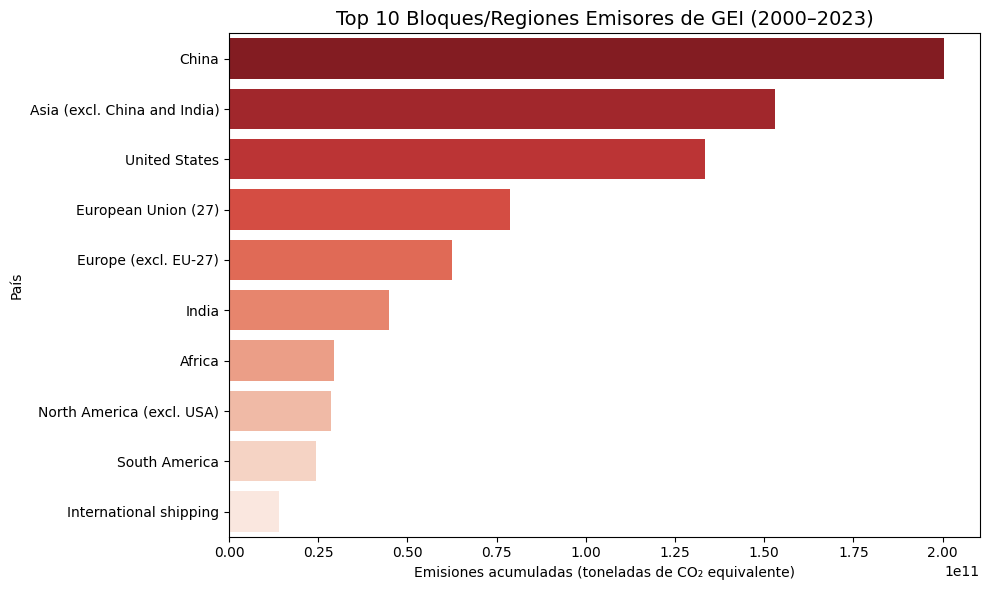

In [77]:
top_anual_co = (
    anual_co.groupby('Entity')['Annual CO₂ emissions']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Graficar utilizando el índice y los valores de la Serie top_anual_co
plt.figure(figsize=(10, 6))
sns.barplot(y=top_anual_co.index, x=top_anual_co.values, palette="Reds_r")
plt.title('Top 10 Bloques/Regiones Emisores de GEI (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂ equivalente)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [79]:
!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------------------- - 6.0/6.3 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 34.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import pycountry

# Crear una lista de nombres de países reales reconocidos por pycountry
paises_reales = [country.name for country in pycountry.countries]

# En algunos casos pycountry tiene nombres diferentes (por ejemplo, "Côte d'Ivoire" vs "Ivory Coast")
# Podemos complementar con algunos nombres adicionales manualmente si es necesario
extras = ['Czechia', 'Democratic Republic of Congo', 'Micronesia (country)', 'North Macedonia']
paises_reales += extras

# Filtrar el DataFrame para conservar solo países reales
greenhouse_ = greenhouse_[greenhouse_['Entity'].isin(paises_reales)]

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_3644\1585487129.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_greeenhouse.index, x=top_greeenhouse.values, palette="Blues_r")


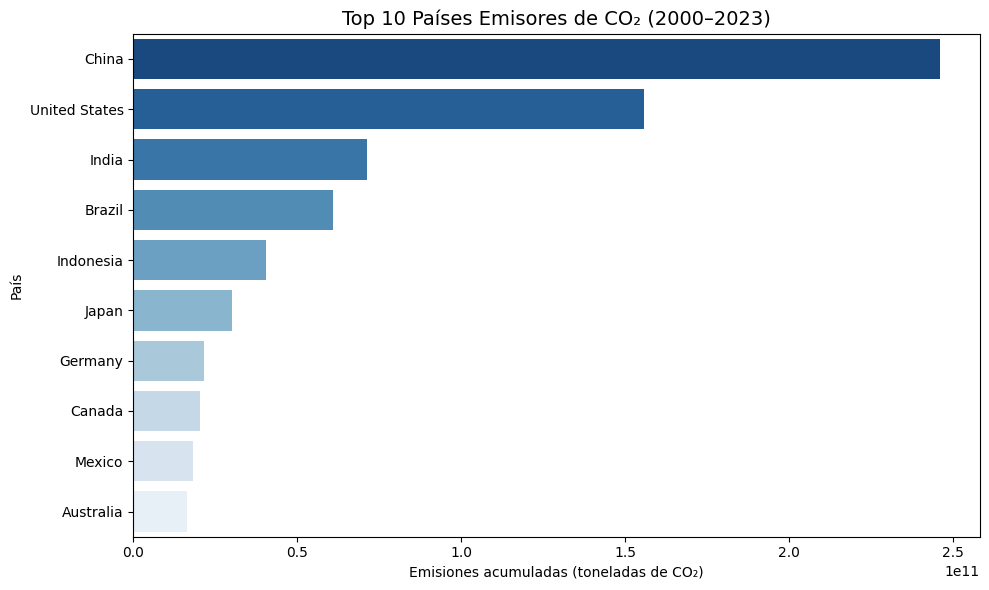

In [84]:
top_greeenhouse = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Gráfico utilizando el índice y los valores de la Serie top_greeenhouse
plt.figure(figsize=(10, 6))
sns.barplot(y=top_greeenhouse.index, x=top_greeenhouse.values, palette="Blues_r")
plt.title('Top 10 Países Emisores de CO₂ (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

C:\Users\RAC-BELLABFES\AppData\Local\Temp\ipykernel_3644\4102738236.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_latin_america.index, x=top_10_latin_america.values, palette="Blues_r")


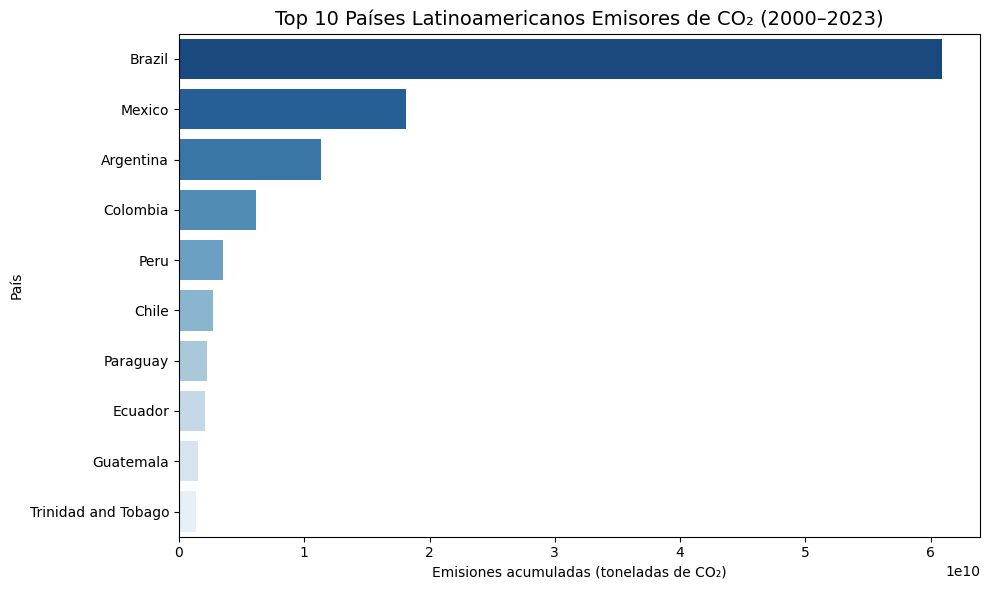

In [89]:
# Lista de países latinoamericanos (en inglés, para que coincida con tu DataFrame)
latin_america_countries = [
    'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Grenada',
    'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Dominican Republic',
    'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Lucia',
    'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela',
    'Antigua and Barbuda', 'Bahamas', 'Barbados'
]

# Agrupa, suma y ordena como antes
top_greenhouse_all = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
)

# Filtra para obtener solo los países latinoamericanos que están en el top
top_greenhouse_latin_america = top_greenhouse_all[top_greenhouse_all.index.isin(latin_america_countries)]

# Toma los 10 principales si hay suficientes países latinoamericanos
top_10_latin_america = top_greenhouse_latin_america.head(10)

# Gráfico utilizando el índice y los valores de la Serie filtrada
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_latin_america.index, x=top_10_latin_america.values, palette="Blues_r")
plt.title('Top 10 Países Latinoamericanos Emisores de CO₂ (2000–2023)', fontsize=14)
plt.xlabel('Emisiones acumuladas (toneladas de CO₂)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [90]:
top10 = (
    greenhouse_.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

In [91]:
comparacion = greenhouse_[
    (greenhouse_['Entity'].isin(top10)) & 
    (greenhouse_['Year'].isin([2000, 2023]))
]

In [87]:
# Ordenar los datos por las emisiones anuales en orden descendente
comparacion_ordenada = comparacion.sort_values(by='Annual greenhouse gas emissions in CO₂ equivalents', ascending=False)

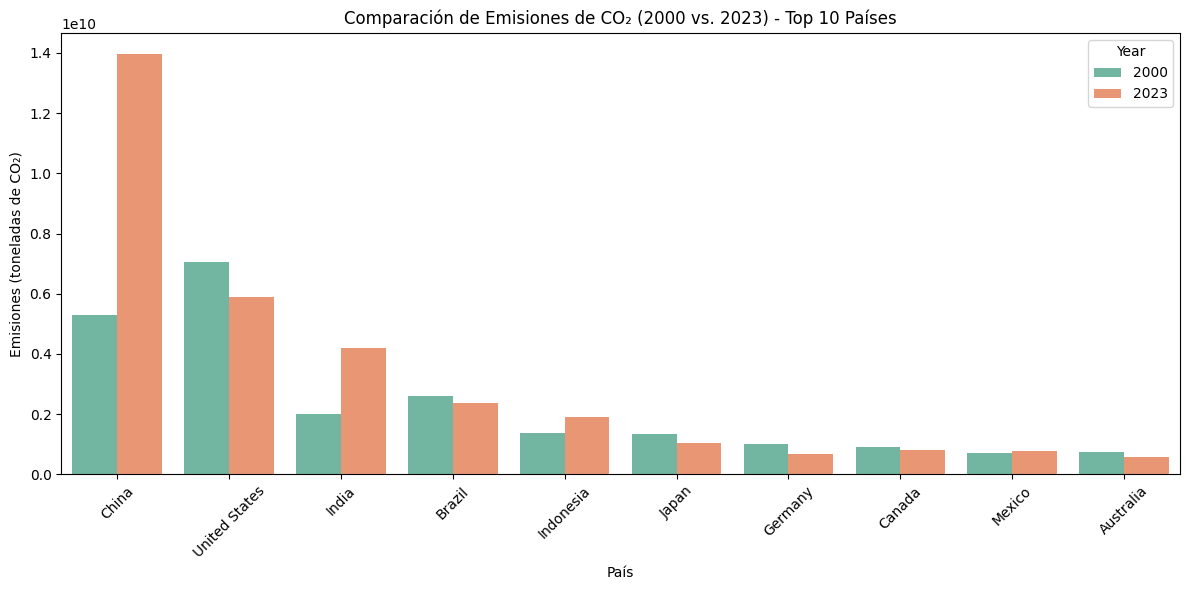

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=comparacion_ordenada,
    x='Entity',
    y='Annual greenhouse gas emissions in CO₂ equivalents',
    hue='Year',
    palette='Set2'
)
plt.title('Comparación de Emisiones de CO₂ (2000 vs. 2023) - Top 10 Países')
plt.ylabel('Emisiones (toneladas de CO₂)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

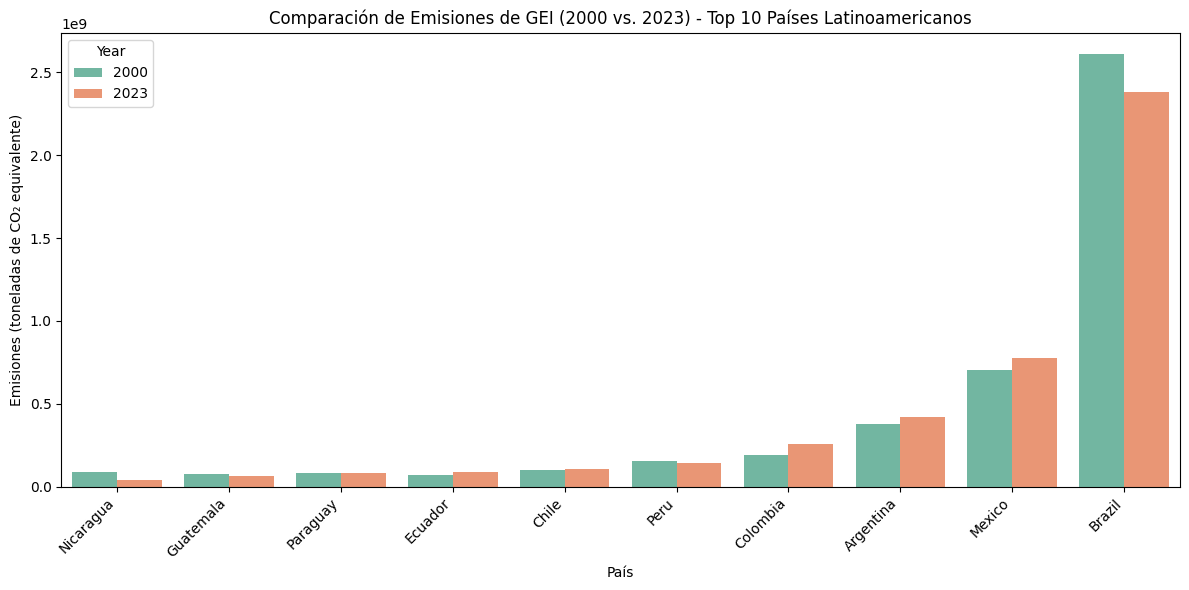

In [97]:
# Lista de países latinoamericanos (en inglés, para que coincida con tu DataFrame)
latin_america_countries = [
    'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Grenada',
    'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Dominican Republic',
    'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Lucia',
    'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela',
    'Antigua and Barbuda', 'Bahamas', 'Barbados'
]

# Filtrar el DataFrame para los años 2000 y 2023 y los países latinoamericanos
emisiones_2000_2023_la = greenhouse_[
    (greenhouse_['Year'].isin([2000, 2023])) & (greenhouse_['Entity'].isin(latin_america_countries))
]

# Agrupar por país y sumar las emisiones para obtener el total en el periodo
total_emisiones_la = emisiones_2000_2023_la.groupby('Entity')['Annual greenhouse gas emissions in CO₂ equivalents'].sum()

# Seleccionar los 10 principales países latinoamericanos según sus emisiones totales
top_10_la = total_emisiones_la.nlargest(10).index.tolist()

# Filtrar nuevamente el DataFrame para incluir solo los 10 principales y los años 2000 y 2023
top_10_emisiones_2000_2023 = emisiones_2000_2023_la[
    emisiones_2000_2023_la['Entity'].isin(top_10_la)
]

# Pivotear los datos para tener las emisiones de 2023 en una columna para ordenar
emisiones_pivot_sort = top_10_emisiones_2000_2023.pivot_table(
    index='Entity', columns='Year', values='Annual greenhouse gas emissions in CO₂ equivalents'
).reset_index()

# Ordenar el DataFrame por las emisiones del año 2023 de forma ascendente
comparacion_ordenada = pd.melt(
    emisiones_pivot_sort.sort_values(by=2023, ascending=True),
    id_vars='Entity',
    value_vars=[2000, 2023],
    var_name='Year',
    value_name='Annual greenhouse gas emissions in CO₂ equivalents'
)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparacion_ordenada,
    x='Entity',
    y='Annual greenhouse gas emissions in CO₂ equivalents',
    hue='Year',
    palette='Set2'
)
plt.title('Comparación de Emisiones de GEI (2000 vs. 2023) - Top 10 Países Latinoamericanos')
plt.ylabel('Emisiones (toneladas de CO₂ equivalente)')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()